<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_faceAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade azure-cognitiveservices-vision-computervision
!pip install --upgrade azure.cognitiveservices.vision.face

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.7 MB/s eta 0:00:00


In [2]:
# AIDI1006-faceAPI.ipynb v.2023
# Sample code 1 - using FaceAPI

import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
# To install this module, run:
# python -m pip install Pillow
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person

# This key will serve all examples in this document.
# This endpoint will be used in all examples in this quickstart.
# KEY = "PASTE_YOUR_SUBSCRIPTION_KEY_HERE"
# ENDPOINT = "PASTE_YOUR_ENDPOINT_HERE"
KEY = "608b6356d9c44f67bab3128b97897ff8"
ENDPOINT = "https://face-ai1006.cognitiveservices.azure.com/"

# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

# Detect a face in an image that contains a single face
single_face_image_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Display the detected face ID in the first single-face image.
# Face IDs are used for comparison to faces (their IDs) detected in other images.
print('Detected face ID from', single_image_name, ':')
for face in detected_faces: print (face.face_id)
print()

# Save this ID for use in Find Similar
first_image_face_ID = detected_faces[0].face_id

Detected face ID from detection1.jpg :
ecb20781-c1e3-4063-b417-9c7b5e3873a1



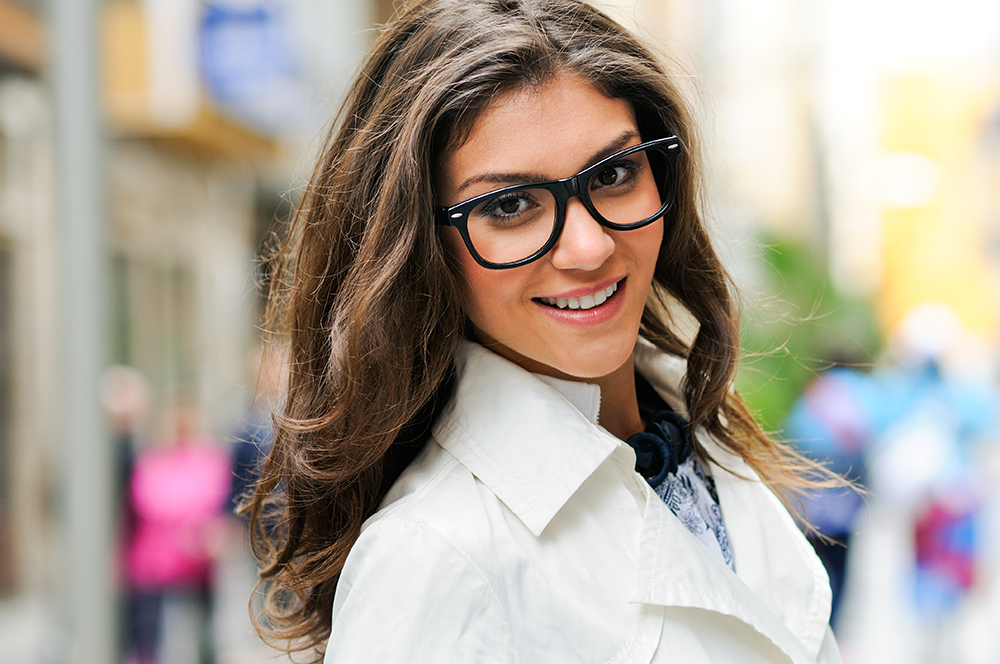

In [3]:
# Read the image URL and print the image file (URL) // Remote image
from PIL import Image
import requests
img = Image.open(requests.get(single_face_image_url, stream=True).raw)
img

In [4]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height

    return ((left, top), (right, bottom))

def drawFaceRectangles() :
# Download the image from the url
    response = requests.get(single_face_image_url)
    img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
    print('Drawing rectangle around face... see popup for results.')
    draw = ImageDraw.Draw(img)
    for face in detected_faces:
        draw.rectangle(getRectangle(face), outline='red')

# Display the image in the default image browser.
    img.show()

# Uncomment this to show the face rectangles.
    drawFaceRectangles()